Observations and Insights

In [25]:
%matplotlib notebook

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
#Checking the number of mice.
study_df["Mouse ID"].value_counts()

g989    13
y478    10
a699    10
j913    10
a685    10
        ..
h428     1
v199     1
l872     1
n482     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [28]:
study_df["Mouse ID"].count()

1893

In [29]:
#study_df.dtypes

In [30]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df[study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].value_counts()

#Is this saying that mouse g989 has duplicated ID across all rows within the data? 

g989    5
Name: Mouse ID, dtype: int64

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.loc[:, "Mouse ID"].unique()

array(['g989'], dtype=object)

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.loc[study_df['Mouse ID'] != 'g989']
#duplicate_mice.loc[duplicate_mice['Mouse ID'] != 'g989'] #removes ALL data
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.loc[:, 'Drug Regimen'].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_DR = clean_df.groupby(['Drug Regimen']) #.apply(list).reset_index()
# mean, median, variance, standard deviation, and SEM of the tumor volume

mean_numpy = grouped_DR['Tumor Volume (mm3)'].mean()
median_numpy = grouped_DR['Tumor Volume (mm3)'].median()
var_numpy = grouped_DR['Tumor Volume (mm3)'].var()
std_numpy = grouped_DR['Tumor Volume (mm3)'].std()
sem_numpy = grouped_DR['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
data1 = {
    'Mean': mean_numpy,
    'Median': median_numpy,
    'Variance': var_numpy,
    'Stdv': std_numpy,
    'SEM': sem_numpy
}

summary1 = pd.DataFrame(data1)
summary1

format_dict = {'Mean':'{0:,.3f}', 'Median': '{:,.3f}', 'Variance': '{:,.3f}', 'Stdv': '{:,.3f}', 'SEM': '{:,.3f}'}
summary1.style.format(format_dict)


,Mean,Median,Variance,Stdv,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [35]:
#Using the aggregation method, produce the same summary statistics in a single line
grouped_DR = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.mean, np.median, np.var, np.std, 'sem'])
grouped_DR

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

<IPython.core.display.Javascript object>


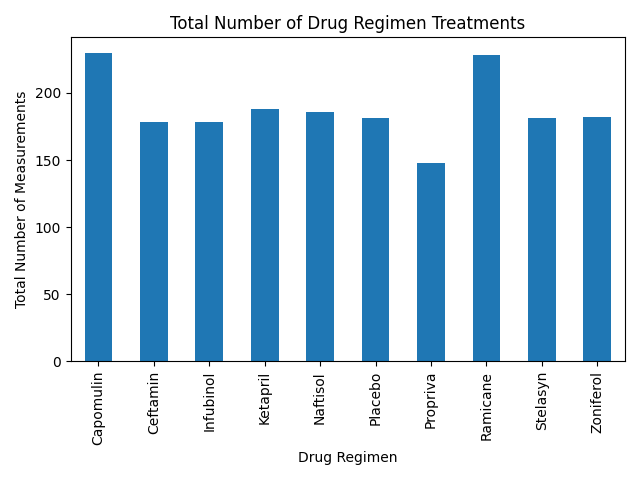

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Create a grouped based on the values in 'Drug Regimen'
grouped_DR = clean_df.groupby('Drug Regimen')

#Find the count
count_DR = grouped_DR['Drug Regimen'].count()
count_DR

#Create a bar chart based off of the the group series from count_DR
panda_chart = count_DR.plot(kind='bar')
panda_chart.set_xlabel("Drug Regimen")
panda_chart.set_ylabel("Total Number of Measurements")
plt.title("Total Number of Drug Regimen Treatments")
plt.tight_layout()
plt.savefig("../Images/BarChartPandas.png")
plt.show()
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

<IPython.core.display.Javascript object>


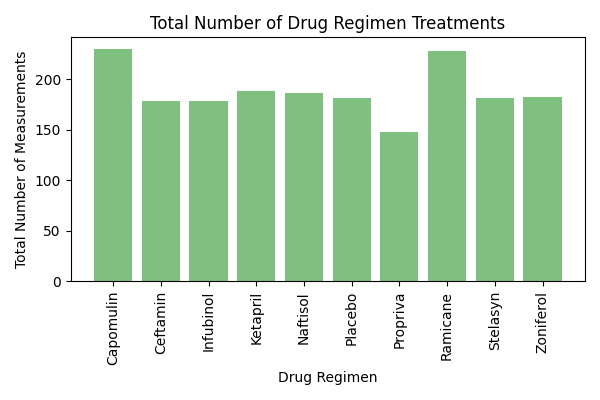

In [55]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Create a grouped based on the values in 'Drug Regimen'
DR_group = clean_df.groupby('Drug Regimen')

#Find the count as the y-axis and set the x-axis range by lenghth of total count of the column 'Drug Regimen'
total_DR = DR_group['Drug Regimen'].count()
x_axis = np.arange(len(total_DR))

#Generate a bar plot using Pyplot
plt.figure(figsize=(6,4))
plt.bar(x_axis, total_DR, color='g', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
# Set a Title and labels
plt.title("Total Number of Drug Regimen Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()
plt.show()
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

<IPython.core.display.Javascript object>


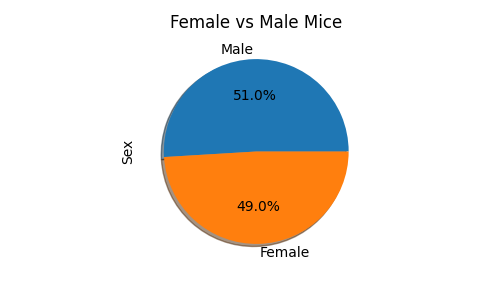

Text(0.5, 1.0, 'Female vs Male Mice')

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Find the count
count_gen = clean_df['Sex'].value_counts()
count_gen

panda_chartpie=count_gen.plot(kind='pie', subplots=True, shadow=True, figsize=(5,3), autopct='%1.1f%%')
plt.title("Female vs Male Mice")
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

<IPython.core.display.Javascript object>


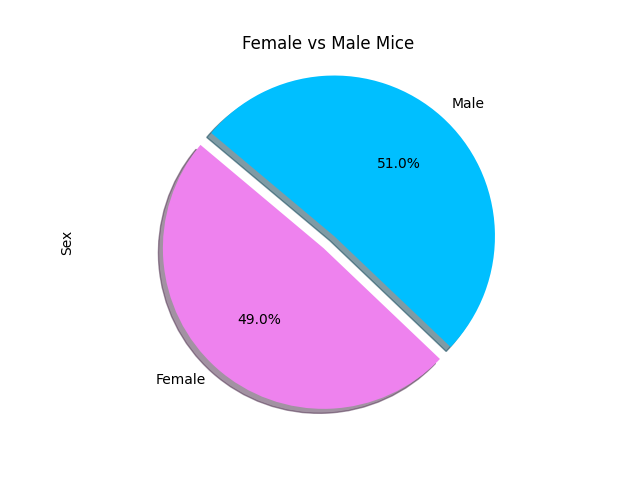

(-1.120369227624225, 1.175585366932385, -1.1141751814166228, 1.186125474151121)

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Find the count
count_gen = clean_df['Sex'].value_counts()
count_gen

#Isolate total count for female vs males in single variable
count_m = clean_df.loc[clean_df['Sex'] == "Male"]
#print(len(count_m.value_counts()))
count_f = clean_df.loc[clean_df['Sex'] == "Female"]
#print(len(count_f.value_counts()))

#Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = [49, 51]
# The colors of each section of the pie chart
colors = ["violet", "deepskyblue"]
# Tells matplotlib to seperate the "Male" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

Quartiles, Outliers, and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Filter data for each treatement

capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
capomulin.head()

# Start by getting the last (greatest) timepoint for each mouse
#This is say the 'last greatest timepoint...'so descending order to find the last timepoint, i.e the greatest timepoint??
#Or do we use max() method for every 'Drug Regimen'?

# find_maxtp = capomulin["Timepoint"].max()
# find_maxtp
lastctp = capomulin.groupby("Mouse ID")["Timepoint"].max()
convert_df = pd.DataFrame(lastctp)
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol = pd.merge(convert_df, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [59]:
#Apply the same methods used for drug regimen capomulin for ramicane
ramican = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]

# Start by getting the last (greatest) timepoint for each mouse
lastrtp = ramican.groupby("Mouse ID")["Timepoint"].max()
convert_df2 = pd.DataFrame(lastrtp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol2 = pd.merge(convert_df2, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [60]:
#Apply the same methods used for drug regimen capomulin for infubinol
infubinol = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]

# Start by getting the last (greatest) timepoint for each mouse
lastitp = infubinol.groupby("Mouse ID")["Timepoint"].max()
convert_df3 = pd.DataFrame(lastitp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol3 = pd.merge(convert_df3, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [61]:
#Apply the same methods used for drug regimen capomulin for ceftamin
ceftamin = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]

# Start by getting the last (greatest) timepoint for each mouse
lastcetp = ceftamin.groupby("Mouse ID")["Timepoint"].max()
convert_df4 = pd.DataFrame(lastcetp)

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
t_vol4 = pd.merge(convert_df4, clean_df, on=("Mouse ID", "Timepoint"), how = "left")

In [62]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes# add subset 

tumor_cap = t_vol["Tumor Volume (mm3)"]
quartile_cap = tumor_cap.quantile([.25, .5, .75])
lowerq = quartile_cap[0.25]
upperq = quartile_cap[0.75]
iqr = upperq-lowerq

sum_cap_table = pd.DataFrame({"Lower Quartile": lowerq,
                              "Upper Quartile": upperq,
                              "IQR": iqr}, index=['Tumor Vol: Capomulin'])

print(sum_cap_table)

###############################Part 2#######################################

#Ramican
tumor_ram = t_vol2["Tumor Volume (mm3)"]
quartile_ram = tumor_ram.quantile([.25, .5, .75])
lowerqr = quartile_ram[0.25]
upperqr = quartile_ram[0.75]
iqr_ram = upperqr-lowerqr

sum_ram_table = pd.DataFrame({"Lower Quartile": lowerqr,
                              "Upper Quartile": upperqr,
                              "IQR": iqr_ram}, index=['Tumor Vol: Ramican'])
print(sum_ram_table)

################################Part 3#####################################

#Infubinol
tumor_i = t_vol3["Tumor Volume (mm3)"]
quartile_i = tumor_i.quantile([.25, .5, .75])
lowerqi = quartile_i[0.25]
upperqi = quartile_i[0.75]
iqr_i = upperqi-lowerqi

sum_i_table = pd.DataFrame({"Lower Quartile": lowerqi,
                              "Upper Quartile": upperqi,
                              "IQR": iqr_i}, index=['Tumor Vol: Infubinol'])
print(sum_i_table)

################################Part 4#####################################

#Ceftamin
tumor_cef = t_vol4["Tumor Volume (mm3)"]
quartile_cef = tumor_cef.quantile([.25, .5, .75])
lowerqcef= quartile_cef[0.25]
upperqcef = quartile_cef[0.75]
iqr_cef = upperqcef-lowerqcef

sum_cef_table = pd.DataFrame({"Lower Quartile": lowerqcef,
                              "Upper Quartile": upperqcef,
                              "IQR": iqr_cef}, index=['Tumor Vol: Ceftamin'])
print(sum_cef_table)

                      Lower Quartile  Upper Quartile       IQR
Tumor Vol: Capomulin       32.377357        40.15922  7.781863
                    Lower Quartile  Upper Quartile       IQR
Tumor Vol: Ramican        31.56047       40.659006  9.098537
                      Lower Quartile  Upper Quartile        IQR
Tumor Vol: Infubinol       54.048608       65.525743  11.477135
                     Lower Quartile  Upper Quartile        IQR
Tumor Vol: Ceftamin       48.722078        64.29983  15.577752


In [63]:
#Determine whether there are outliers present in the IQR by setting LB and UB for all drug regimens

#Capomulin 
lower_bound1 = lowerq - (1.5*iqr)
upper_bound1 = upperq + (1.5*iqr)

outlier_cap = pd.DataFrame({"Lower Bound": lower_bound1,
                            "Upper Bound": upper_bound1}, index=['Possible Outliers: Capomulin'])
print(outlier_cap)

###############################Part 2#######################################

#Ramican
lower_bound2 = lowerqr - (1.5*iqr_ram)
upper_bound2 = upperqr + (1.5*iqr_ram)

outlier_ram = pd.DataFrame({"Lower Bound": lower_bound2,
                            "Upper Bound": upper_bound2}, index=['Possible Outliers: Ramican'])
print(outlier_ram)

###############################Part 3#######################################

#Infubinol
lower_bound3 = lowerqi - (1.5*iqr_i)
upper_bound3 = upperqi + (1.5*iqr_i)

outlier_i = pd.DataFrame({"Lower Bound": lower_bound3,
                          "Upper Bound": upper_bound3}, index=['Possible Outliers: Infubinol'])
print(outlier_i)

###############################Part 4#######################################

#Ceftamin
lower_bound4 = lowerqcef - (1.5*iqr_cef)
upper_bound4 = upperqcef + (1.5*iqr_cef)

outlier_cef = pd.DataFrame({"Lower Bound": lower_bound4,
                          "Upper Bound": upper_bound4}, index=['Possible Outliers: Ceftamin'])
print(outlier_cef)

                              Lower Bound  Upper Bound
Possible Outliers: Capomulin    20.704562    51.832015
                            Lower Bound  Upper Bound
Possible Outliers: Ramican    17.912664    54.306811
                              Lower Bound  Upper Bound
Possible Outliers: Infubinol    36.832905    82.741446
                             Lower Bound  Upper Bound
Possible Outliers: Ceftamin     25.35545    87.666458


<IPython.core.display.Javascript object>


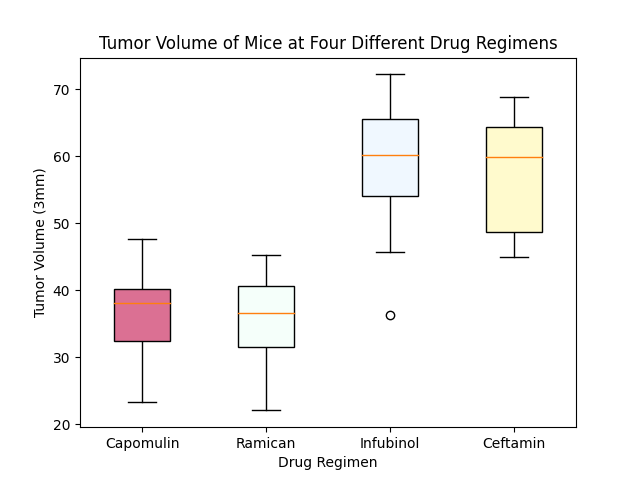

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Want to show the final tumor volume, need to use variable that was set to filter out tumor volumn
#...from merged data...? 

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice at Four Different Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (3mm)')
x_axis = [tumor_cap, tumor_ram, tumor_i, tumor_cef]
bplot1 = ax1.boxplot(x_axis, vert=True, patch_artist=True, labels=["Capomulin", "Ramican", "Infubinol", "Ceftamin"])
# fill with colors
colors = ['palevioletred', 'mintcream', 'aliceblue', 'lemonchiffon']
for bplot in (bplot1):
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
plt.show()
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

Line and Scatter Plots

<IPython.core.display.Javascript object>


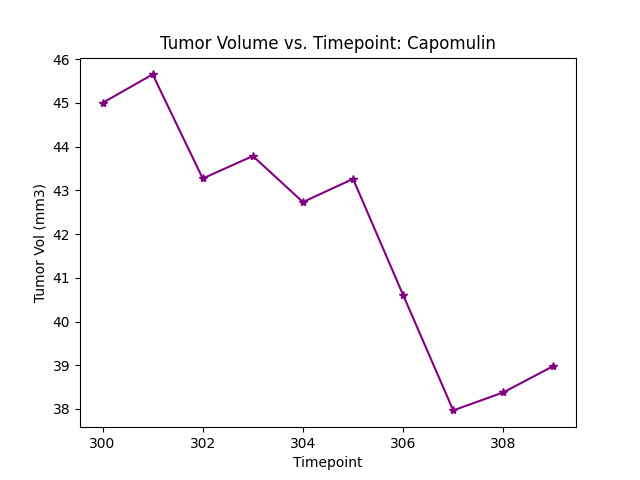

Text(0, 0.5, 'Tumor Vol (mm3)')

In [201]:
filter_1mouse = clean_df.loc[clean_df['Mouse ID'] == 'b128', :]
filter_1mouse.head()

lp_tum = filter_1mouse["Tumor Volume (mm3)"]
lp_time = filter_1mouse["Timepoint"]
plt.plot(lp_time.keys(), lp_tum, marker= "*", color="purple")
plt.title("Tumor Volume vs. Timepoint: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol (mm3)")
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

In [216]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

filter_1mouse = clean_df.loc[clean_df['Mouse ID'] == 'b128', :]
filter_1mouse.head()

sp_tum = filter_1mouse["Tumor Volume (mm3)"]
sp_weight = filter_1mouse["Weight (g)"]

# Create a random array of data that we will use for our y values
data = [random.random() for value in sp_weight]

plt.scatter(sp_weight, data, marker="D", facecolors="cyan", edgecolors="black", 
            s=sp_weight, alpha=0.75)
plt.title("Tumor Volume vs. Weight: Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Vol (mm3)")
# plt.savefig("../Images/ScatterPlotCap.png")
# plt.show()

NameError: name 'random' is not defined

Correlation and Regression

In [187]:
# # Calculate the correlation coefficient and linear regression model 
# # for mouse weight and average tumor volume for the Capomulin regimen

# # t_vol.head() #Checking the location of mice weight (g) and tumor volume (mm3)
# #with the scatter plot, you're plotting all points up to column 6 at x_axis
# #...and up to column 7 at y_axis
# avgtvol = t_vol['Tumor Volume (mm3)'].mean()
# weight_mice = t_vol['Weight (g)']
# plt.scatter(weight_mice, avgtvol, marker="o", facecolors="cyan", edgecolors="black", 
#             s=sp_weight, alpha=0.75)
# plt.title('Mouse Weight and Average Tumor Vol for Capomulin regimen')
# plt.xlabel('Weight (g)')
# plt.ylabel('Tumor Vol (mm3)')
# plt.show()